In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [6]:
df = pd.read_csv('/Users/richardwestbrook/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/burnout rate.csv', parse_dates=["Date of Joining"])

In [7]:
snap_date = datetime.datetime(2009, 1, 1)
df["Tenure"] = df["Date of Joining"].apply(lambda x: (snap_date-x).days)

In [32]:
def burnout_binning(burn_rate):
    if burn_rate >= 0.6:
        return 'High'
    elif burn_rate >= 0.4:
        return 'Med'
    else:
        return 'Low'

In [33]:
df["Burnout Classification"] = df["Burn Rate"].apply(lambda x: burnout_binning(x))

In [36]:
df.dropna(inplace=True)
df.head(5)

,Designation,Resource Allocation,Mental Fatigue Score,Tenure,Gender_Male,Company Type_Service,WFH Setup Available_Yes,Burnout Classification
0,2.0,3.0,3.8,93,0,1,0,Low
1,1.0,2.0,5.0,32,1,1,1,Low
3,1.0,1.0,2.6,59,1,1,1,Low
4,3.0,7.0,6.9,161,0,1,0,Med
5,2.0,4.0,3.6,36,1,0,1,Low


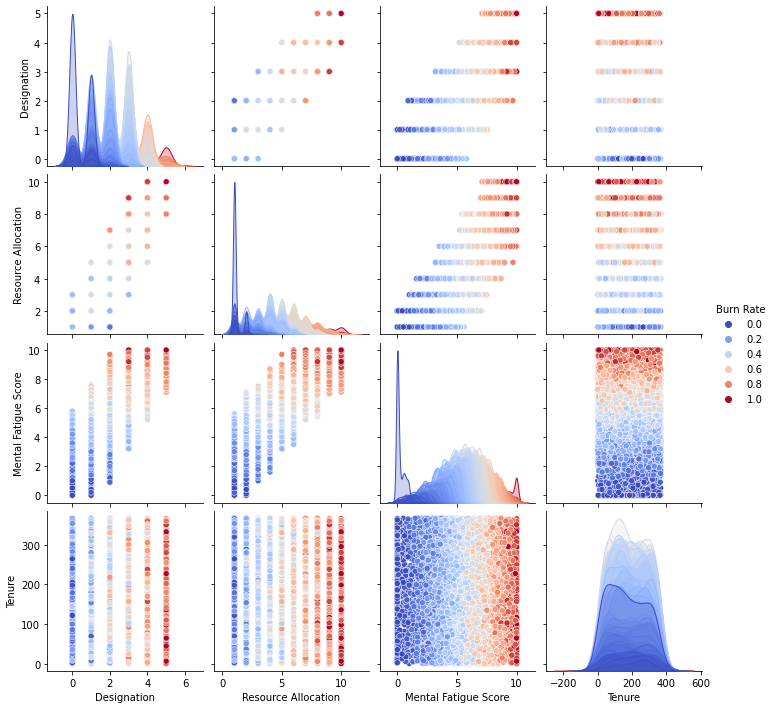

In [28]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='Burnout Classification',palette='coolwarm')

In [ ]:
df = df.drop("Burn Rate", axis = 1)

In [13]:
cat_feats = ['Gender','Company Type','WFH Setup Available']
df = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [18]:
df = df.drop(['Employee ID','Date of Joining'], axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [37]:
scaler.fit(df.drop('Burnout Classification',axis=1))

StandardScaler()

In [38]:
scaled_features = scaler.transform(df.drop('Burnout Classification',axis=1))

In [39]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Designation,Resource Allocation,Mental Fatigue Score,Tenure,Gender_Male,Company Type_Service,WFH Setup Available_Yes
0,-0.158322,-0.726994,-1.006081,-0.859693,-0.952499,0.725965,-1.082464
1,-1.040844,-1.216041,-0.381242,-1.439084,1.049870,0.725965,0.923818
2,-1.040844,-1.705088,-1.630920,-1.182632,1.049870,0.725965,0.923818
3,0.724199,1.229194,0.608086,-0.213815,-0.952499,0.725965,-1.082464
4,-0.158322,-0.237947,-1.110221,-1.401091,1.049870,-1.377477,0.923818


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Burnout Classification'],
                                                    test_size=0.30)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
pred = knn.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred))

[[1040    1  322]
 [   0 1811  348]
 [ 303  346 1406]]


In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       0.77      0.76      0.77      1363
         Low       0.84      0.84      0.84      2159
         Med       0.68      0.68      0.68      2055

    accuracy                           0.76      5577
   macro avg       0.76      0.76      0.76      5577
weighted avg       0.76      0.76      0.76      5577



In [50]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

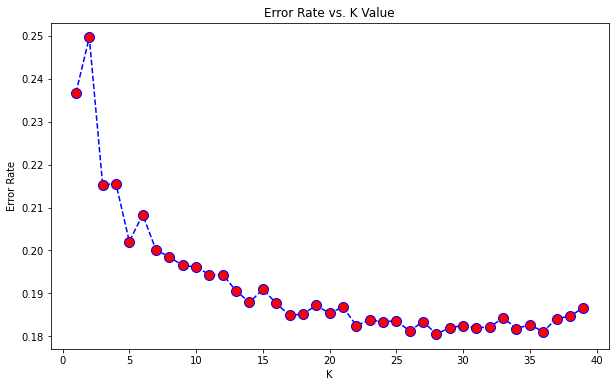

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=26


[[1098    0  265]
 [   0 1857  302]
 [ 208  236 1611]]


              precision    recall  f1-score   support

        High       0.84      0.81      0.82      1363
         Low       0.89      0.86      0.87      2159
         Med       0.74      0.78      0.76      2055

    accuracy                           0.82      5577
   macro avg       0.82      0.82      0.82      5577
weighted avg       0.82      0.82      0.82      5577

